In [54]:
import requests
import json
import pickle_util

from elasticsearch import Elasticsearch

%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [15]:
# config
# g_name = 'dev'
# g_name = 'train'
g_name = 'full'

In [16]:
res = requests.get('http://localhost:9200')

In [17]:
# config
api_base_url = '/api/v1'
es_base_url = {
    'articles': 'http://localhost:9200/articles/article',
}

Development (dev) dataset, containing the first 10 articles

In [47]:
url = es_base_url['articles']+'/_search'
query = {
    'dev' : {
        "query" : {
            "match_all" : {},
        },
        "size" : 100
    },
    'train' : {
        "query": {
            "match_all" : {},
        },
        "size" : 1000
    },
    'full' : {
        "query": {
            "match_all" : {},
        },
        "size" : 50000,
        "fields": ['source']
    }
}

In [48]:
resp = requests.post(url, data=json.dumps(query[g_name]))
data = resp.json()

In [50]:
print data

{u'status': 500, u'error': {u'failed_shards': [{u'node': u'AdaHwRJtRjOKrDAFo12x4Q', u'index': u'articles', u'reason': {u'reason': u'Result window is too large, from + size must be less than or equal to: [10000] but was [50000]. See the scroll api for a more efficient way to request large data sets. This limit can be set by changing the [index.max_result_window] index level parameter.', u'type': u'query_phase_execution_exception'}, u'shard': 0}], u'root_cause': [{u'reason': u'Result window is too large, from + size must be less than or equal to: [10000] but was [50000]. See the scroll api for a more efficient way to request large data sets. This limit can be set by changing the [index.max_result_window] index level parameter.', u'type': u'query_phase_execution_exception'}], u'grouped': True, u'reason': u'all shards failed', u'phase': u'query', u'type': u'search_phase_execution_exception'}}


In [49]:
print len(data['hits']['hits'])

KeyError: 'hits'

In [29]:
pickle_util.save_obj(data, g_name)

In [9]:
print type(data['hits']['hits'])

<type 'list'>


In [30]:
import pandas as pd

In [34]:
df = pd.DataFrame([doc['_source'] for doc in data['hits']['hits']])
df.head()

,author,canonical-source,canonical-source-name,content,detected-language,english-language-confidence,feed,language,language-confidences,media-type,...,source,source-groups,spotlight-entities,stanford-entities,story-uuid,summary,title,topics,tracking-url,url
0,Liz McMillan,caaf6463-bb6b-422a-848f-fa2c8c74ee5d,Sys-Con Italia,"NEW YORK, Sept. 1, 2015 /PRNewswire/ -- Radiat...",en,0.999997906887078,MOREOVER,English,{u'en': u'0.999997906887078'},News,...,Sys-Con Italia,[],"[{u'confidence': 0.395171647599, u'annotation-...","[{u'start-offset': 36, u'surface-form': u'Asia...",87c94bca-7864-44ac-be1b-e546a21acd9c,"NEW YORK, Sept. 1, 2015 /PRNewswire/ -- Radiat...",Global Market Study on Gamma Knife: Asia to Wi...,[],http://ct.moreover.com/?a=22517042385&p=1h4&v=...,http://article.signal.uk.com/8f78fdd9-103a-4e5...
1,NaN,e8c5bd87-07f0-4586-b629-12fa0be55e4d,ABC30,"BEREA, Ohio -- Browns quarterback Johnny Manzi...",en,0.9999959955911536,MOREOVER,English,{u'en': u'0.9999959955911536'},News,...,ABC30,[],"[{u'confidence': 0.504678928234, u'annotation-...","[{u'start-offset': 0, u'surface-form': u'Johnn...",3288c28a-f87d-4d69-905e-290c07b657f3,"BEREA, Ohio -- Browns quarterback Johnny Manzi...",Johnny Manziel says surgery not necessary on s...,[],http://ct.moreover.com/?a=22516063214&p=1h4&v=...,http://article.signal.uk.com/dca8a22b-782f-464...
2,Chris Boulous,99c32fa4-47f8-4ccd-9a39-75129ee3c3d2,Hills News,"By Aug. 31, 2015, 2:53 p.m. \n\nSYDNEY, AUSTRA...",en,0.9999987045747505,MOREOVER,English,{u'en': u'0.9999987045747505'},News,...,Hills News,[],"[{u'confidence': 0.314977491442, u'annotation-...","[{u'start-offset': 30, u'surface-form': u'SYDN...",8473cbff-63b5-4756-a494-2ae9a2d3efb8,"By Aug. 31, 2015, 2:53 p.m. \n\nSYDNEY, AUSTRA...",Eels' turbulent year not all bad with signs of...,[],http://ct.moreover.com/?a=22506721588&p=1h4&v=...,http://article.signal.uk.com/a447027e-a801-448...
3,NaN,17694b80-268c-454d-a054-1c19e67b22ac,Albuquerque News.Net,APS superintendent resigns CFOs lawsuit remain...,en,0.9999968457555863,MOREOVER,English,{u'en': u'0.9999968457555863'},News,...,Albuquerque News.Net,[],"[{u'confidence': 0.190819287906, u'annotation-...","[{u'start-offset': 15, u'surface-form': u'Micr...",55dc821e-b0da-4a70-a99e-c153d3c10d01,APS superintendent resigns CFOs lawsuit remain...,Money talks -- Microsoft to provide details of...,[],http://ct.moreover.com/?a=22515338615&p=1h4&v=...,http://article.signal.uk.com/cdb383f3-3c52-4b9...
4,NaN,5f199bf0-9a88-480f-bd12-176132b67a6d,WMCTV.com,SOURCE Internet Marketing Association\n\nAnnua...,en,0.9999984704998388,MOREOVER,English,{u'en': u'0.9999984704998388'},News,...,WMCTV.com,[],"[{u'confidence': 0.394218785416, u'annotation-...","[{u'start-offset': 52, u'surface-form': u'Inte...",8221f8df-d7bd-4e4d-9c36-6b8c4e506de1,SOURCE Internet Marketing Association\n\nAnnua...,Influential Thought Leaders to Converge on Sta...,[],http://ct.moreover.com/?a=22514615177&p=1h4&v=...,http://article.signal.uk.com/331e4b3f-69c9-40b...


In [37]:
df['source'].value_counts()

MyInforms                                                         192
Individual.com                                                     65
4 Traders                                                          52
Marketplace                                                        46
Yahoo! Finance                                                     45
Reuters                                                            43
Fat Pitch Financials                                               41
Town Hall                                                          40
Mail Online UK                                                     39
Wall Street Business Network                                       39
Market Pulse Navigator                                             38
Bloomberg                                                          37
App.ViralNewsChart.com                                             36
NewsR.in                                                           36
Latest Nigerian News

(array([  5.05500000e+03,   2.30000000e+01,   6.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   20.1,   39.2,   58.3,   77.4,   96.5,  115.6,  134.7,
         153.8,  172.9,  192. ]),
 <a list of 10 Patch objects>)

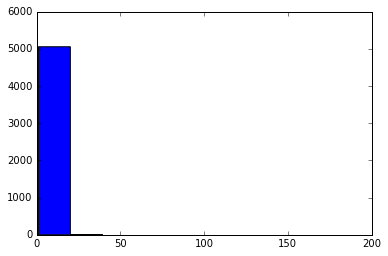

In [46]:
plt.hist(df['source'].value_counts())

In [56]:
es = Elasticsearch()

In [64]:
res_ = []

res = es.search(
    index="articles",
    scroll = '2m',
    search_type = 'scan',
    size = 1000,
)

sid = res['_scroll_id']
scroll_size = res['hits']['total']

# Start scrolling
while (scroll_size > 0):
    print "Scrolling..."
    res = es.scroll(scroll_id = sid, scroll = '2m')
    # Update the scroll ID
    sid = res['_scroll_id']
    # Get the number of results that we returned in the last scroll
    scroll_size = len(res['hits']['hits'])
    print "scroll size: " + str(scroll_size)
    # Do something with the obtained page
    print type(res)
    res_.append(res['hits']['hits'])

Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 5000
<type 'dict'>
Scrolling...
scroll size: 3022
<type 'dict'>
Scrolling...
scroll size: 0
<type 'dict'>


In [65]:
len(res_)

10

In [66]:
print type(res_[0])

<type 'list'>


In [67]:
res_flat = []
for r in res_:
    res_flat.extend(r)

In [69]:
print len(res_flat)

43022


In [70]:
print res_flat[0]

{u'_score': 0.0, u'_type': u'article', u'_id': u'8f78fdd9-103a-4e50-83a1-f9cdfa83f29a', u'_source': {u'feed': u'MOREOVER', u'tracking-url': u'http://ct.moreover.com/?a=22517042385&p=1h4&v=1&x=NQxuDqqPrK4OZSGyUdzwpQ', u'source-groups': [], u'topics': [], u'signal-entities': [{u'confidence': 0.39517164759930257, u'annotation-probability': 0.5454545454545454, u'degree': 19, u'signal-type': u'none', u'coherence': 0.24488874974405972, u'surface-form': u'Gamma Knife', u'offset': 23, u'position': u'title', u'wiki-title': u'Radiosurgery', u'types': None}, {u'confidence': 0.19365150470098297, u'annotation-probability': 0.23997221739885397, u'degree': 26, u'signal-type': u'none', u'coherence': 0.14733079200311197, u'surface-form': u'Asia', u'offset': 36, u'position': u'title', u'wiki-title': u'Asia', u'types': None}, {u'confidence': 0.32134750959807856, u'annotation-probability': 0.545602912138837, u'degree': 21, u'signal-type': u'location', u'coherence': 0.09709210705732005, u'surface-form': u'

In [71]:
df = pd.DataFrame([doc['_source'] for doc in res_flat])

In [72]:
df['source'].value_counts()

MyInforms                                    835
Individual.com                               323
4 Traders                                    258
Reuters                                      203
Town Hall                                    182
NewsR.in                                     180
App.ViralNewsChart.com                       172
Marketplace                                  168
Wall Street Business Network                 167
Yahoo! Finance                               159
Fat Pitch Financials                         159
Market Pulse Navigator                       159
Mail Online UK                               158
Financial Content                            156
Latest Nigerian News.com                     155
BioSpace                                     155
Wall Street Select                           145
Bloomberg                                    142
Pettinga Financial Advisors                  139
CEOWorld Magazine                            131
MoneyShow.com       

(array([  1.37430000e+04,   8.10000000e+01,   8.00000000e+00,
          1.40000000e+01,   5.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   1. ,   42.7,   84.4,  126.1,  167.8,  209.5,  251.2,  292.9,
         334.6,  376.3,  418. ,  459.7,  501.4,  543.1,  584.8,  626.5,
         668.2,  709.9,  751.6,  793.3,  835. ]),
 <a list of 20 Patch objects>)

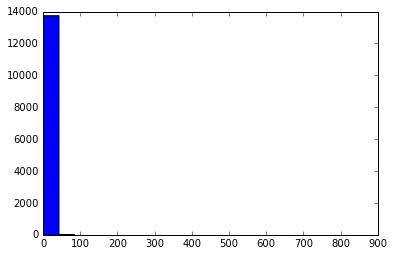

In [75]:
plt.hist(df['source'].value_counts(), bins=20)